In [95]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('/content/drive/MyDrive/Dataset_depression/Dataset.csv')
data.drop(['Timestamp'], axis = 1, inplace = True)
data.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
2,4th year,Bad,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
3,4th year,Normal,45,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
4,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,Yes,Family,Yes,No,Yes,No,No,7


In [97]:
new_data = data.dropna(axis = 0)

In [98]:
new_data.shape

(703, 20)

In [99]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Which year are you in?                                                                        703 non-null    object
 1   How are you feeling right now?                                                                703 non-null    object
 2   On a scale of 1-100, how would you express this feeling?                                      703 non-null    int64 
 3   Gender                                                                                        703 non-null    object
 4   Age                                                                                           703 non-null    int64 
 5   Your location ?                     

In [100]:
data1 = new_data.copy()

In [101]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Data Processing

In [102]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1 = new_data.apply(LabelEncoder().fit_transform)
data1

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,0,2,49,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4
1,0,2,39,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4
2,0,0,49,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4
3,0,2,44,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4
4,0,2,49,0,0,2,0,1,3,2,1,1,1,0,0,1,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,2,61,0,0,3,0,1,4,2,0,0,0,1,0,0,2,0,0,5
700,0,4,89,0,0,3,0,1,4,2,0,0,1,0,0,1,0,0,1,6
701,0,4,91,0,0,1,0,1,4,2,0,1,1,0,0,1,2,0,0,5
702,0,4,98,0,0,3,0,1,3,1,0,1,1,1,0,1,2,0,1,7


# Fiting the standardized data using PCA.

In [103]:
from sklearn.decomposition import PCA

In [104]:
pca = PCA()
compressed_data = pca.fit_transform(data1)

In [105]:
pca.explained_variance_ratio_     #deciding how many features i would like to keep based on the cumulative variance plot.

array([9.90692328e-01, 2.19395238e-03, 1.74736385e-03, 1.32643545e-03,
       9.74043162e-04, 8.85380413e-04, 4.51651282e-04, 3.62902782e-04,
       2.88253259e-04, 2.74080898e-04, 2.30853525e-04, 1.92704774e-04,
       1.57919934e-04, 1.50965361e-04, 7.11648166e-05, 1.50624163e-35,
       4.59561186e-36, 6.48532320e-37, 3.56261084e-38, 0.00000000e+00])

Text(0, 0.5, 'Cumulative Explained Variance')

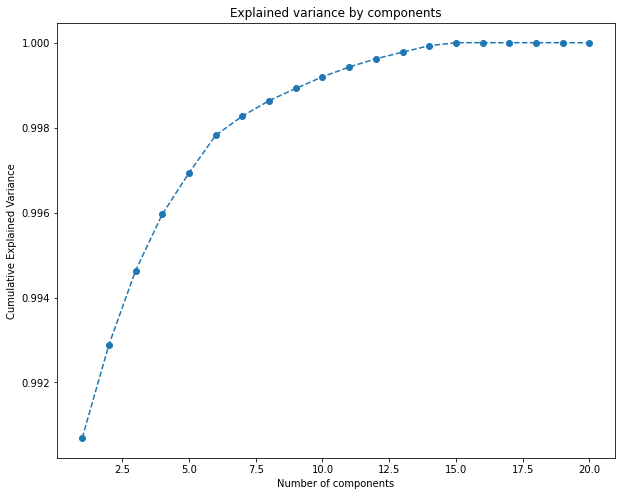

In [106]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained variance by components")
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

# Performing PCA with chosen number of components

In [107]:
pca = PCA(n_components = 3)

In [108]:
pca.fit(data1)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [109]:
pca.transform(data1)

array([[  6.15293253,  -0.66919003,   0.72866287],
       [ 16.14872008,  -1.06059115,   1.041042  ],
       [  6.18825989,   0.90415567,   1.9637371 ],
       ...,
       [-35.87429597,  -1.14165958,  -1.19072154],
       [-42.92996658,  -1.77111111,  -0.06694638],
       [-29.85176674,   0.92371773,   0.90355995]])

In [110]:
score_pca = pca.transform(data1)

# Chosing K using Elbow method

In [111]:
wcss = []    #WCSS is the sum of squared distance between each point and the centroid in a cluster

for k in range(1,9):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(score_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

wcss

[646098.3813633753,
 153513.5125634852,
 65048.70461699538,
 37238.85100463095,
 21867.03234113112,
 16893.142748637194,
 12824.010894046782,
 9982.419119107015]

Text(0.5, 1.0, 'K-means with PCA clustering')

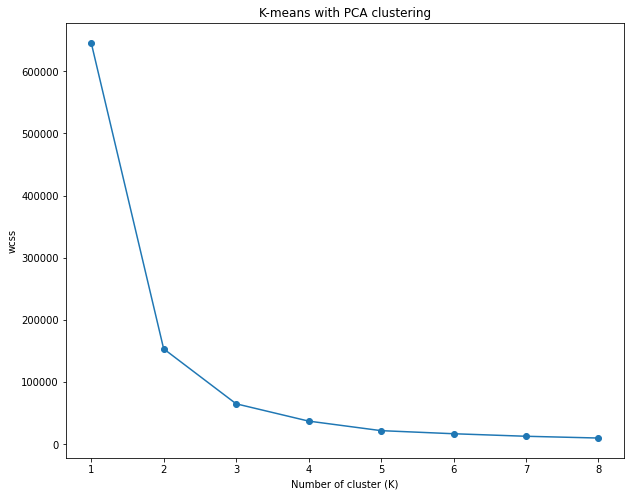

In [112]:
plt.figure(figsize=(10,8))
plt.plot(range(1,9), wcss, marker = 'o', linestyle = '-')
plt.xlabel('Number of cluster (K)')
plt.ylabel('wcss')
plt.title('K-means with PCA clustering')

In [113]:
km  = KMeans(n_clusters= 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
km.fit(score_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [115]:
y_pred = km.fit_predict(score_pca)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0,
       0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2,
       0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0,
       0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2,
       1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2,

# Analyze the Results of PCA and K-Means Clustering

In [122]:
df = pd.concat([data1.reset_index(drop = True), pd.DataFrame(score_pca)], axis = 1)
df.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df['Segment K-means PCA'] = km.labels_

In [123]:
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours),Component 1,Component 2,Component 3,Segment K-means PCA
0,0,2,49,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4,6.152933,-0.669190,0.728663,0
1,0,2,39,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4,16.148720,-1.060591,1.041042,0
2,0,0,49,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4,6.188260,0.904156,1.963737,0
3,0,2,44,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4,11.144013,-0.892333,0.903135,0
4,0,2,49,0,0,2,0,1,3,2,1,1,1,0,0,1,2,0,0,4,6.160064,-0.635737,0.710484,0


In [124]:
df['segment'] = df['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third'})

In [125]:
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours),Component 1,Component 2,Component 3,Segment K-means PCA,segment
0,0,2,49,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4,6.152933,-0.669190,0.728663,0,first
1,0,2,39,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4,16.148720,-1.060591,1.041042,0,first
2,0,0,49,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4,6.188260,0.904156,1.963737,0,first
3,0,2,44,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4,11.144013,-0.892333,0.903135,0,first
4,0,2,49,0,0,2,0,1,3,2,1,1,1,0,0,1,2,0,0,4,6.160064,-0.635737,0.710484,0,first


# Ploting graph of Clustering

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


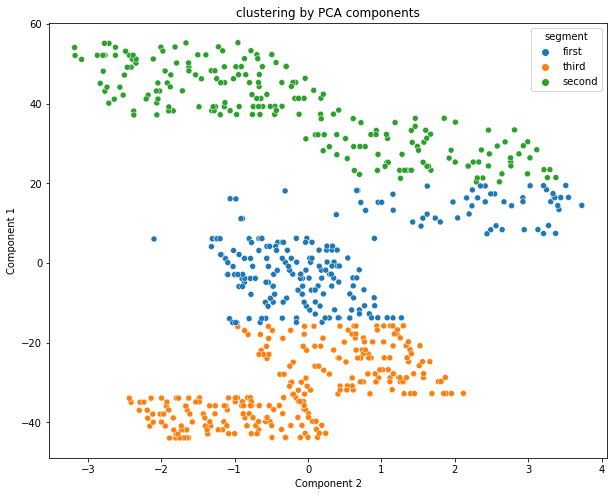

In [126]:
x_axis = df['Component 2']
y_axis = df['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df['segment'])
plt.title('clustering by PCA components')
plt.show()